#<div align="center">Project Data Modeling</div>
## <div align="center">Predicting Salaries with Comparative Analysis Using Multiple Linear Regression and Artificial Neural Networks</div>
#### <div align="center"> </div>
<br>


*   Evan Lo








# New Section

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from flask import Flask, request, jsonify
from sklearn.model_selection import train_test_split
import os
from scipy import stats
%matplotlib inline

Data Importing

In [ ]:
df = pd.read_csv('Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
df.shape

(6704, 6)

## **Exploratory Data Analysis**

In [ ]:
df = df.dropna()

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [ ]:
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [ ]:
df.shape

(6698, 6)

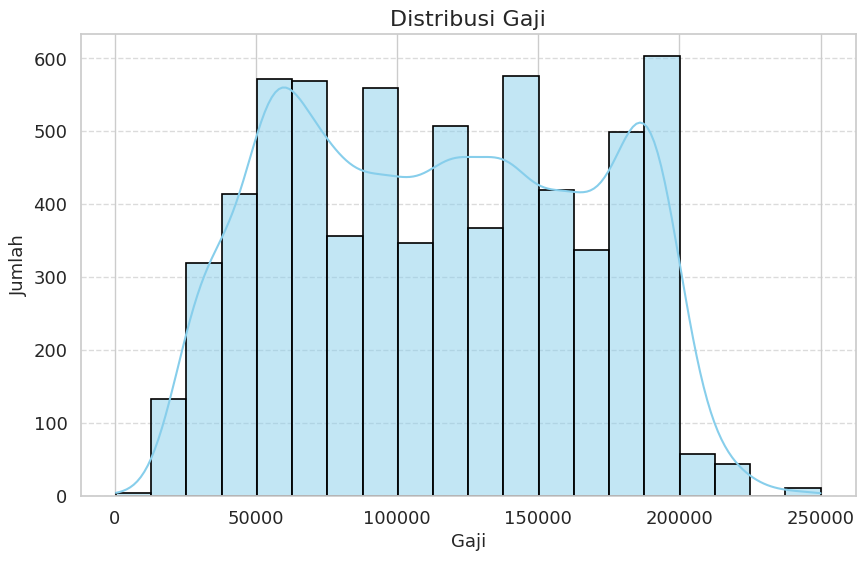

In [ ]:
#Distribution data

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Salary', bins=20, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Distribusi Gaji', fontsize=16)
plt.xlabel('Gaji', fontsize=13)
plt.ylabel('Jumlah', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-104-c982e1b809b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Years of Experience', y='Salary', palette='viridis')


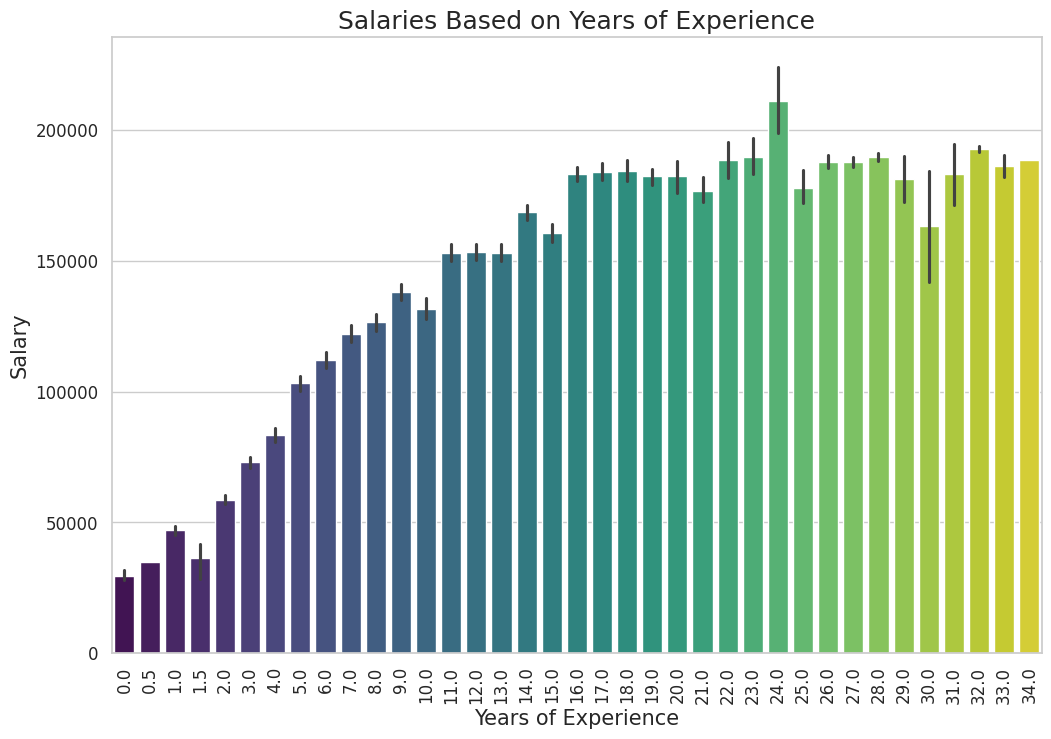

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
plt.title("Salaries Based on Years of Experience", fontsize=18)
sns.barplot(data=df, x='Years of Experience', y='Salary', palette='viridis')
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<ipython-input-105-092e726338a9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Education Level', y='Salary', palette='magma')


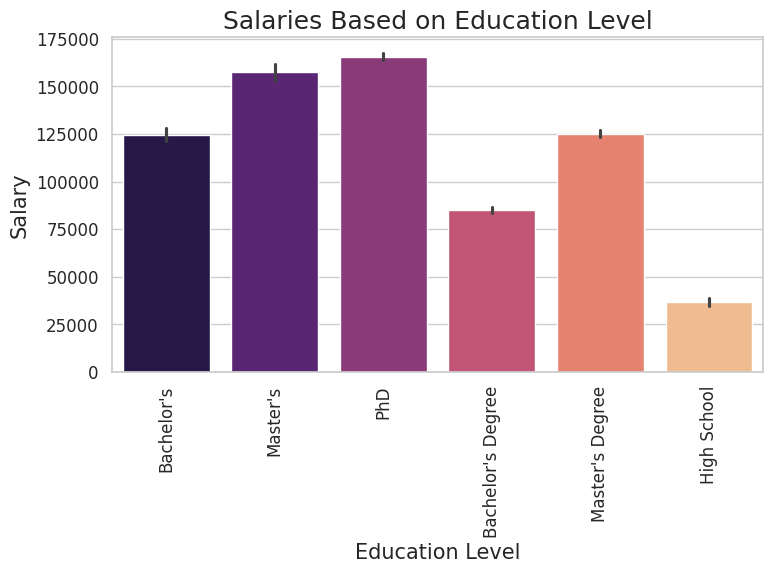

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.3)
sns.set_style('whitegrid')
plt.title("Salaries Based on Education Level", fontsize=18)
sns.barplot(data=df, x='Education Level', y='Salary', palette='magma')
plt.xlabel('Education Level', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Visualize the percentage of Education Level with pie chart

edu_level_value = df['Education Level'].value_counts()
edu_level_value

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1369
Bachelor's            756
High School           448
Master's              288
Name: count, dtype: int64

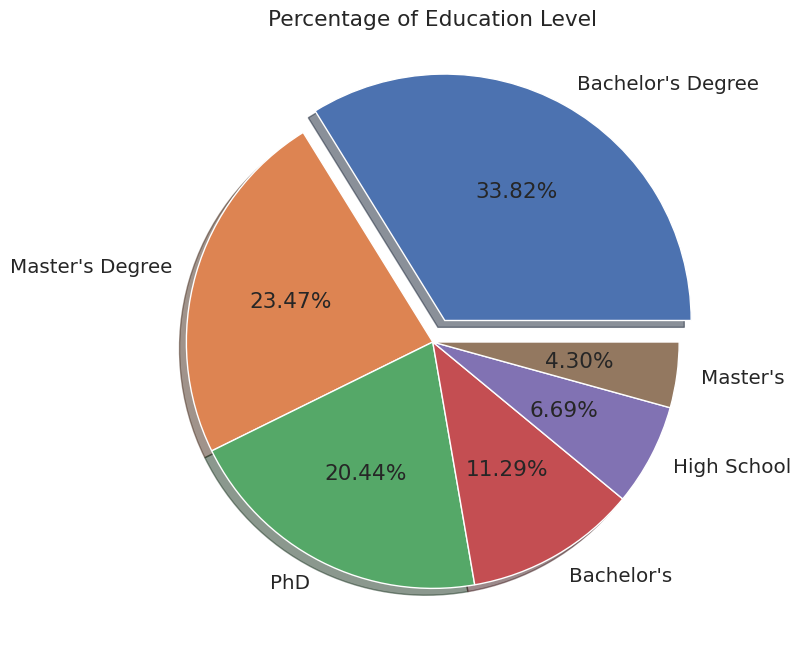

In [ ]:
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0, 0, 0)
plt.pie(edu_level_value, labels=edu_level_value.index, autopct='%2.2f%%', explode=explode, shadow=True)
plt.title('Percentage of Education Level')
plt.show()

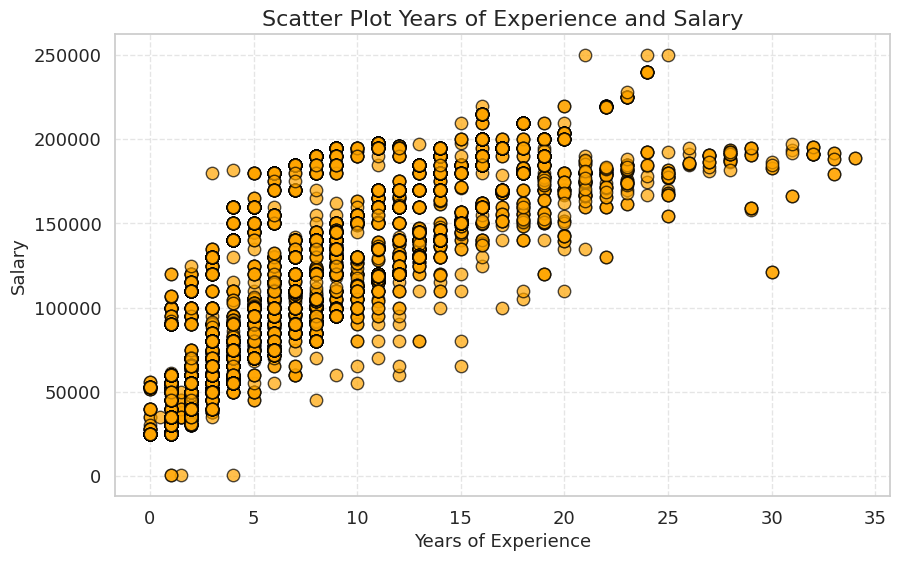

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Years of Experience'], df['Salary'], color='orange', alpha=0.7, s=80, edgecolor='black')
plt.title('Scatter Plot Years of Experience and Salary', fontsize=16)
plt.xlabel('Years of Experience', fontsize=13)
plt.ylabel('Salary', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

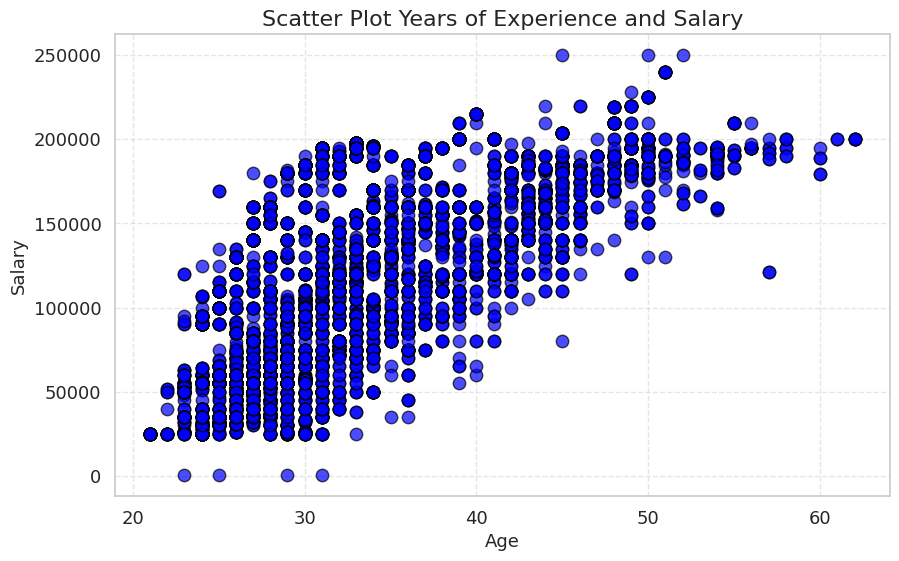

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], color='blue', alpha=0.7, s=80, edgecolor='black')
plt.title('Scatter Plot Years of Experience and Salary', fontsize=16)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Salary', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## **Data Preprocessing**

In [ ]:
#Change data type of Years of Experience and Age

df['Years of Experience'] = df['Years of Experience'].astype(int)
df['Age'] = df['Age'].astype(int)
df

<ipython-input-110-90c8b83d27e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Years of Experience'] = df['Years of Experience'].astype(int)
<ipython-input-110-90c8b83d27e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5,90000.0
1,28,Female,Master's,Data Analyst,3,65000.0
2,45,Male,PhD,Senior Manager,15,150000.0
3,36,Female,Bachelor's,Sales Associate,7,60000.0
4,52,Male,Master's,Director,20,200000.0
...,...,...,...,...,...,...
6699,49,Female,PhD,Director of Marketing,20,200000.0
6700,32,Male,High School,Sales Associate,3,50000.0
6701,30,Female,Bachelor's Degree,Financial Manager,4,55000.0
6702,46,Male,Master's Degree,Marketing Manager,14,140000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   int64  
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   int64  
 5   Salary               6698 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 366.3+ KB


In [ ]:
#Encoding Education Level and Gender

encode = LabelEncoder()
encode.fit(df['Education Level'])

df['Education Level'] = encode.transform(df['Education Level'])
df['Education Level'] = df['Education Level'] + 1

encoded_classes = encode.classes_
print("Rentang angka setelah label encoding:", list(encoded_classes))

Rentang angka setelah label encoding: ["Bachelor's", "Bachelor's Degree", 'High School', "Master's", "Master's Degree", 'PhD']


<ipython-input-112-d5fea67506f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = encode.transform(df['Education Level'])
<ipython-input-112-d5fea67506f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education Level'] = df['Education Level'] + 1


In [ ]:
encode = LabelEncoder()
encode.fit(df['Job Title'])

df['Job Title'] = encode.transform(df['Job Title'])
df['Job Title'] = df['Job Title'] + 1

<ipython-input-113-89698c5a7784>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = encode.transform(df['Job Title'])
<ipython-input-113-89698c5a7784>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'] + 1


In [ ]:
encode.fit(df['Gender'])
df['Gender'] = encode.transform(df['Gender'])
df['Gender'] = df['Gender'] + 1
df

<ipython-input-114-c8c773759295>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = encode.transform(df['Gender'])
<ipython-input-114-c8c773759295>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'] + 1


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,2,1,176,5,90000.0
1,28,1,4,19,3,65000.0
2,45,2,6,145,15,150000.0
3,36,1,1,116,7,60000.0
4,52,2,4,26,20,200000.0
...,...,...,...,...,...,...
6699,49,1,6,34,20,200000.0
6700,32,2,3,116,3,50000.0
6701,30,1,2,42,4,55000.0
6702,46,2,5,97,14,140000.0


Note:
- 1 = Bachelor
- 2 = Bachelor Degree
- 3 = High School
- 4 = Master
- 5 = Master Degree
- 6 = phD

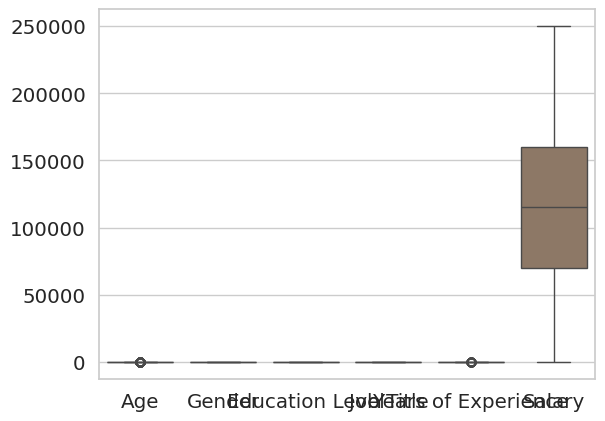

<Figure size 2000x600 with 0 Axes>

In [ ]:
#Delete Outliers with IQR

sns.boxplot(data=df)
plt.figure(figsize=(20,6))
plt.show()

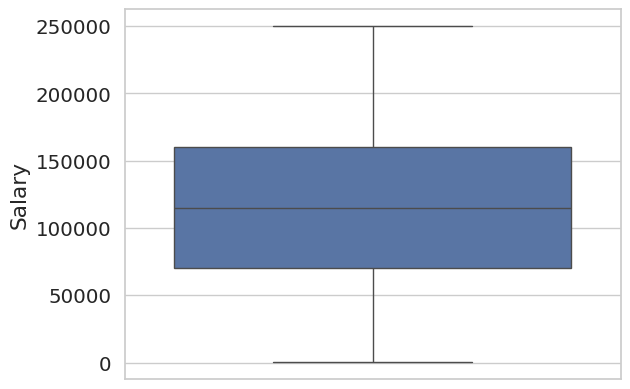

In [ ]:
sns.boxplot(data=df, y='Salary')
plt.show()

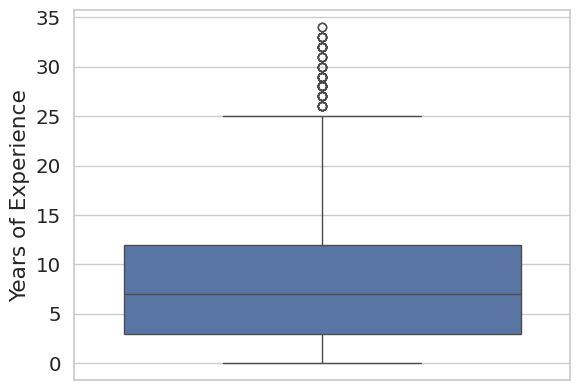

In [ ]:
sns.boxplot(data=df, y='Years of Experience')
plt.show()

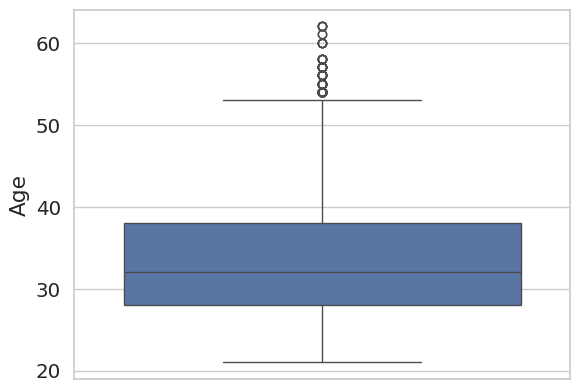

In [ ]:
sns.boxplot(data=df, y='Age')
plt.show()

In [ ]:
q1 = df.quantile(q = .25)
q3 = df.quantile(q = .75)
iqr = q3 - q1

df_salaries = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
df_salaries.shape

(6550, 6)

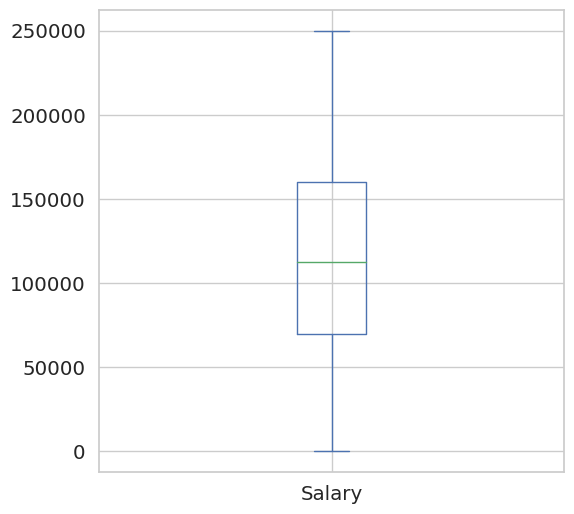

In [ ]:
df_salaries.plot( kind='box', figsize=(6,6), y='Salary')
plt.show()

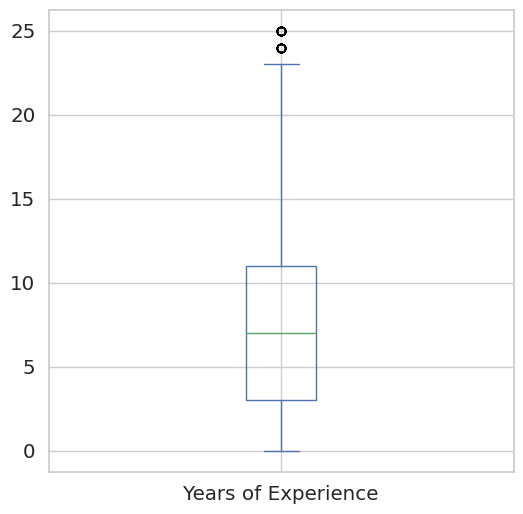

In [ ]:
df_salaries.plot( kind='box', figsize=(6,6), y='Years of Experience')
plt.show()

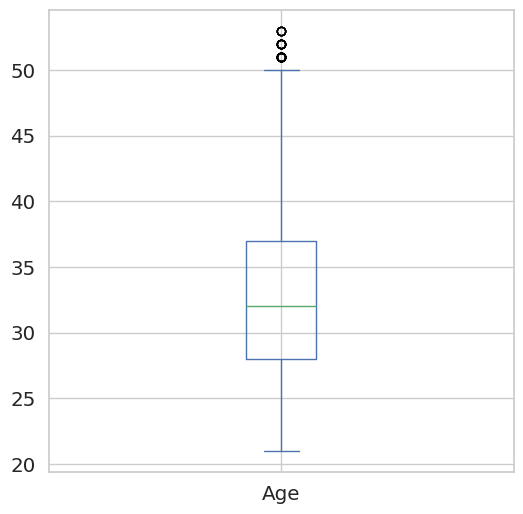

In [ ]:
df_salaries.plot( kind='box', figsize=(6,6), y='Age')
plt.show()

- Exploratory Data Analysis (EDA)

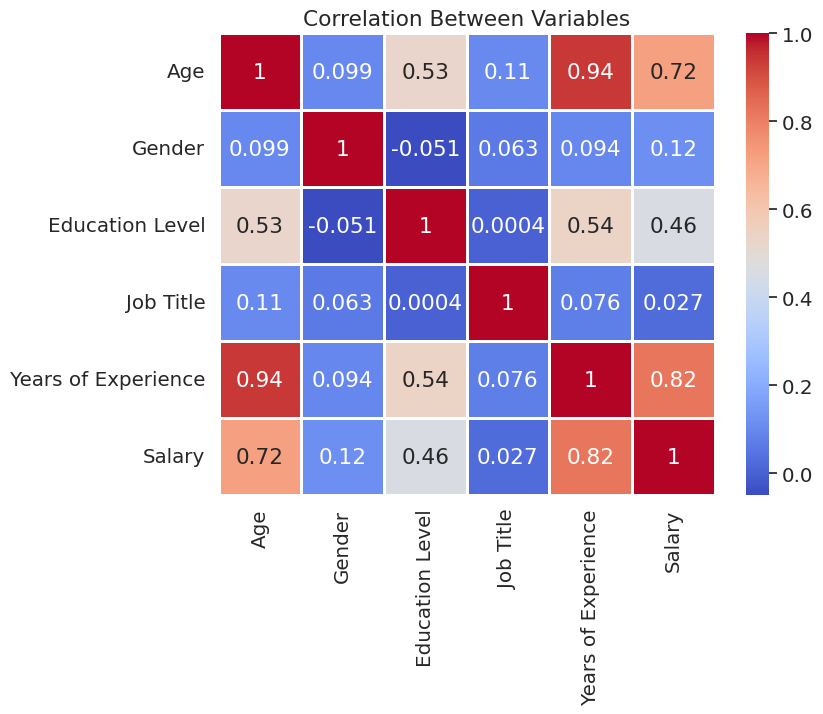

In [ ]:
#Correlation

df_salariess = df_salaries[['Age', 'Gender', 'Job Title', 'Years of Experience', 'Salary']]

plt.figure(figsize=(8,6))
sns.heatmap(df_salaries.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Between Variables')
plt.show()

In [ ]:
df = df.drop(columns='Job Title')

- Data Visualization

- Modeling with Machine Learning

In [ ]:
#Determine x and y

x = df_salaries[['Age', 'Gender','Years of Experience', 'Education Level']]
y = df_salaries['Salary'].values.reshape(-1,1)

In [ ]:
#Standardize the data

standard = StandardScaler()
x_scaled = standard.fit_transform(x)
y_scaled = standard.fit_transform(y)

In [ ]:
#Split train and test data

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(5240, 4) (1310, 4)
(5240, 1) (1310, 1)


In [ ]:
#Linear Model

from sklearn import linear_model

regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
print('Coeffients: ', regression.coef_)
print('Intercept: ', regression.intercept_)

Coeffients:  [[-0.46744087  0.04604852  1.23697219  0.04389663]]
Intercept:  [0.00165127]


In [ ]:
y_pred = regression.predict(x_test)
print('Predicted: ', y_pred)

Predicted:  [[-0.12096403]
 [ 0.40392471]
 [ 1.27350075]
 ...
 [-0.7213205 ]
 [-0.12800733]
 [-0.61279173]]


In [ ]:
#Error rate evaluation

print("Mean absolute error: %.2f" %mean_absolute_error(y_pred=y_pred, y_true=y_test))
print("Residual sum of squares (MSE): %.2f" %np.mean((y_pred- y_test) ** 2))
print("R2-Score: %.2f" %r2_score(y_test, y_pred))

Mean absolute error: 0.44
Residual sum of squares (MSE): 0.30
R2-Score: 0.70


In [ ]:
y_test_inverse = standard.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = standard.inverse_transform(y_pred.reshape(-1, 1))

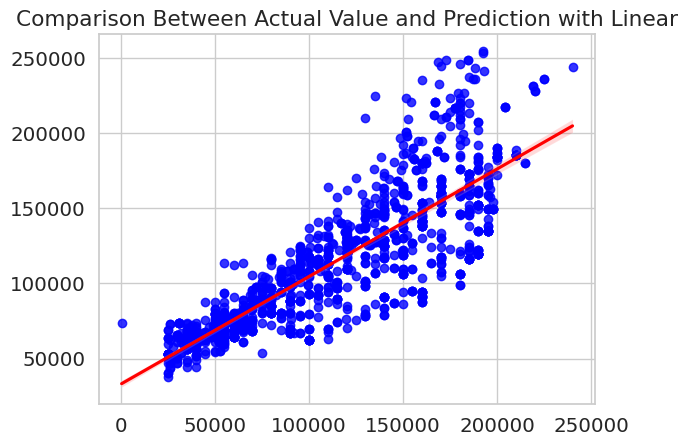

In [ ]:
ax = sns.regplot(x=y_test_inverse, y=y_pred_inverse,
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Comparison Between Actual Value and Prediction with Linear')
plt.show()

In [ ]:
#with ANN
x_train, x_test, y_train, y_test = train_test_split(x_scaled,
                                                    y_scaled, test_size = 0.2, random_state = 42)

In [ ]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu", input_dim=x.shape[1]),

    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="elu"),
    tf.keras.layers.Dense(units=32, activation="elu"),
    tf.keras.layers.Dense(units=64, activation="tanh"),
    tf.keras.layers.Dense(units=32, activation="tanh"),

    tf.keras.layers.Dense(units=1, activation="linear")
])
ann.compile(optimizer="adam", loss="mean_squared_error", metrics=['mae'])

ann.fit(x_train, y_train, epochs=100, batch_size=11, validation_data=(x_test, y_test), verbose=2)

Epoch 1/100
477/477 - 5s - loss: 0.2184 - mae: 0.3567 - val_loss: 0.1770 - val_mae: 0.3269 - 5s/epoch - 11ms/step
Epoch 2/100
477/477 - 2s - loss: 0.1525 - mae: 0.2975 - val_loss: 0.1398 - val_mae: 0.2824 - 2s/epoch - 5ms/step
Epoch 3/100
477/477 - 1s - loss: 0.1325 - mae: 0.2758 - val_loss: 0.1359 - val_mae: 0.2800 - 1s/epoch - 3ms/step
Epoch 4/100
477/477 - 1s - loss: 0.1253 - mae: 0.2678 - val_loss: 0.1280 - val_mae: 0.2804 - 1s/epoch - 2ms/step
Epoch 5/100
477/477 - 1s - loss: 0.1218 - mae: 0.2649 - val_loss: 0.1232 - val_mae: 0.2619 - 1s/epoch - 3ms/step
Epoch 6/100
477/477 - 2s - loss: 0.1153 - mae: 0.2552 - val_loss: 0.1203 - val_mae: 0.2719 - 2s/epoch - 4ms/step
Epoch 7/100
477/477 - 1s - loss: 0.1135 - mae: 0.2548 - val_loss: 0.1235 - val_mae: 0.2695 - 1s/epoch - 3ms/step
Epoch 8/100
477/477 - 1s - loss: 0.1129 - mae: 0.2538 - val_loss: 0.1183 - val_mae: 0.2554 - 1s/epoch - 2ms/step
Epoch 9/100
477/477 - 1s - loss: 0.1062 - mae: 0.2467 - val_loss: 0.1183 - val_mae: 0.2555 - 1s

In [ ]:
y_pred = ann.predict(x_test)

41/41 [==============================] - 0s 2ms/step


In [ ]:
print("Mean absolute error: %.2f" %mean_absolute_error(y_pred=y_pred, y_true=y_test))
print("Residual sum of squares (MSE): %.2f" %np.mean((y_pred- y_test) ** 2))
print("R2-Score: %.2f" %r2_score(y_test, y_pred))

Mean absolute error: 0.17
Residual sum of squares (MSE): 0.06
R2-Score: 0.94


In [ ]:
y_test_inverse = standard.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = standard.inverse_transform(y_pred.reshape(-1, 1))

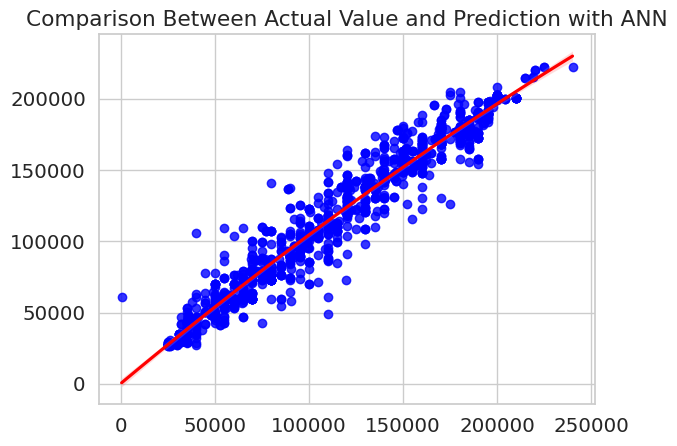

In [ ]:
sns.regplot(x=y_test_inverse, y=y_pred_inverse,
                 order=2, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Comparison Between Actual Value and Prediction with ANN')
plt.show()

In [ ]:
app = Flask(__name__)


model_path = r'D:\Tugas Kuliah P4\Data Modeling\Project\salary_prediction_model.h5'
x_scaler_path = r'D:\Tugas Kuliah P4\Data Modeling\Project\x_scaler.pkl'
y_scaler_path = r'D:\Tugas Kuliah P4\Data Modeling\Project\y_scaler.pkl'


print("Current Working Directory:", os.getcwd())

print("Model exists:", os.path.exists(model_path))
print("X Scaler exists:", os.path.exists(x_scaler_path))
print("Y Scaler exists:", os.path.exists(y_scaler_path))


try:
    model = tf.keras.models.load_model(model_path)
    x_scaler = joblib.load(x_scaler_path)
    y_scaler = joblib.load(y_scaler_path)
except Exception as e:
    print(f"Error loading model or scalers: {e}")
    exit(1)

@app.route('/predict', methods=['POST'])
def predict():
    try:

        data = request.get_json(force=True)

        if not data:
            return jsonify({'error': 'No input data provided'}), 400


        features = np.array([data['Age'], data['Gender'], data['Years of Experience'], data['Education Level']])
        features = x_scaler.transform([features])

        prediction = model.predict(features)
        prediction = y_scaler.inverse_transform(prediction.reshape(-1, 1))

        predicted_salary = float(prediction[0][0])

        return jsonify({'Your Salary is.... ': predicted_salary})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=False)